In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv('Mall_Customers.csv')
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
print(X)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

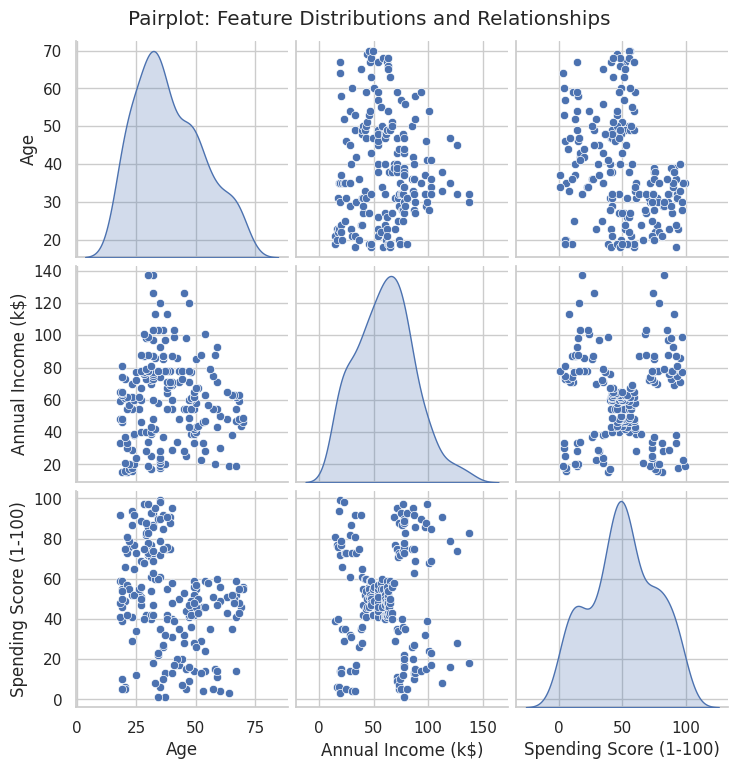

In [6]:
sns.pairplot(df[features], diag_kind='kde')
plt.suptitle('Pairplot: Feature Distributions and Relationships', y=1.02)
plt.show()

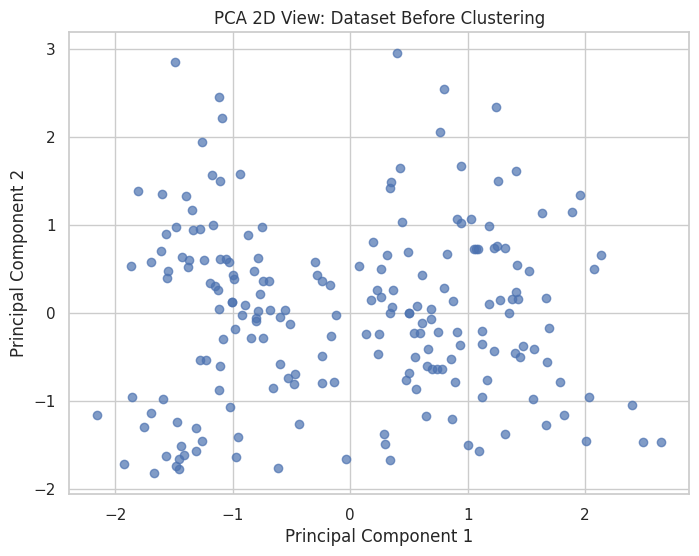

Explained variance by PCA: [0.44266167 0.33308378]


In [9]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title('PCA 2D View: Dataset Before Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(f'Explained variance by PCA: {pca.explained_variance_ratio_}')

In [11]:
# Initial fit with arbitrary K=3
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print(pd.DataFrame(centroids, columns=features))

         Age  Annual Income (k$)  Spending Score (1-100)
0  50.406250           60.468750               33.343750
1  32.853659           87.341463               79.975610
2  25.142857           43.269841               56.507937


In [12]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

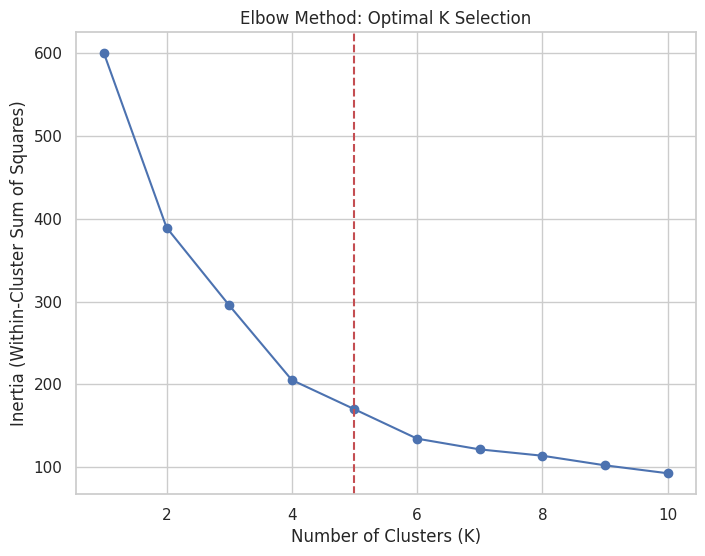

In [13]:
# Plot Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method: Optimal K Selection')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.axvline(x=5, color='r', linestyle='--')  # Assuming elbow at 5
plt.show()

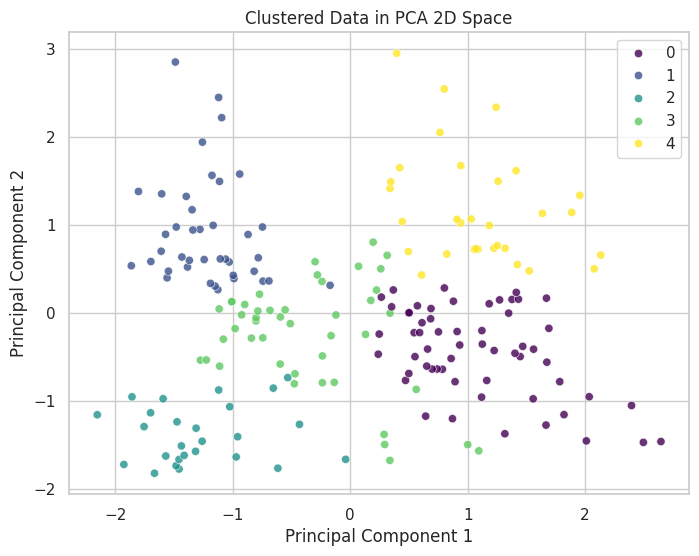

In [14]:
# Refit with optimal K (say 5 from Elbow)
optimal_k = 5
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
labels_opt = kmeans_opt.fit_predict(X_scaled)
df['Optimal_Cluster'] = labels_opt

# 2D PCA visualization with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_opt, palette='viridis', alpha=0.8)
plt.title('Clustered Data in PCA 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

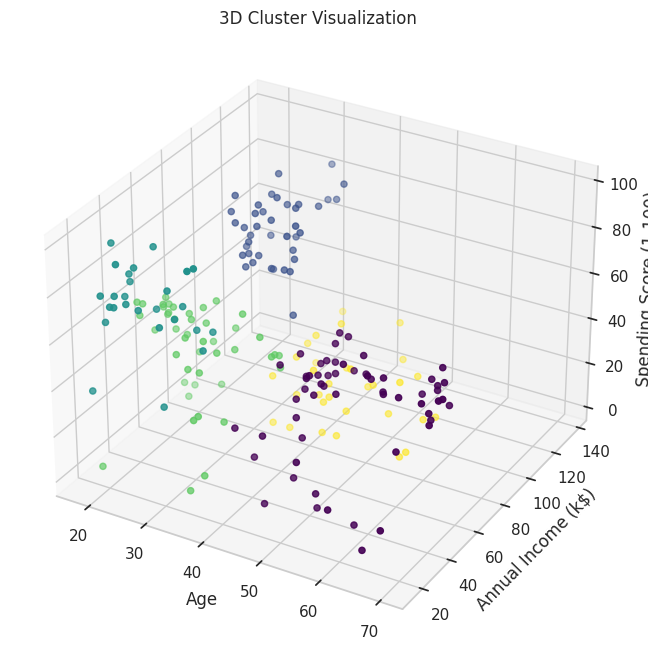

In [15]:
#3D scatter for deeper intuition (using original features)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels_opt, cmap='viridis')
ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [16]:
# Computing Silhouette Score for optimal K
sil_score = silhouette_score(X_scaled, labels_opt)
print(f'Silhouette Score for K={optimal_k}: {sil_score:.2f}')


Silhouette Score for K=5: 0.41


In [17]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

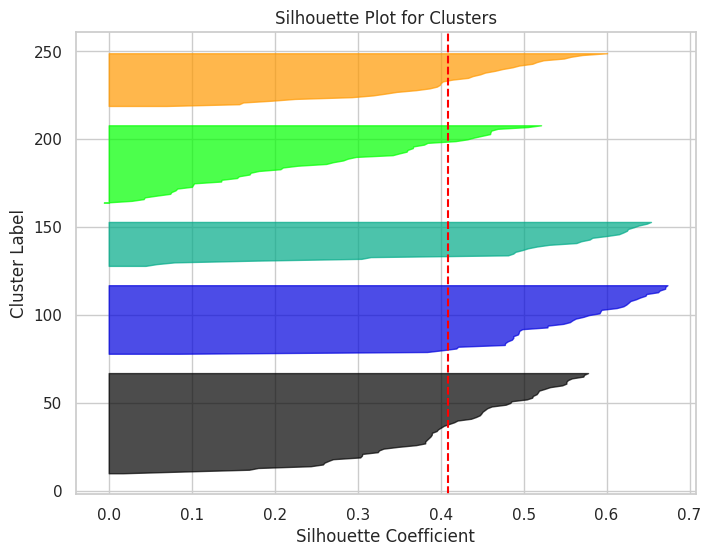

In [18]:
sil_values = silhouette_samples(X_scaled, labels_opt)
y_lower = 10
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(optimal_k):
    cluster_sils = sil_values[labels_opt == i]
    cluster_sils.sort()
    size = cluster_sils.shape[0]
    y_upper = y_lower + size
    color = cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sils, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax.set_title('Silhouette Plot for Clusters')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster Label')
ax.axvline(x=sil_score, color='red', linestyle='--')
plt.show()